### Fig. 3

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
sys.path.append('/home/caoyuyao/dataset_14T/UID-Moji/src')
import backend_bases
from visualization import ObservationMap
from utils import TcTools, get_geodistance, load_pressure_data, get_hour_list, find_which_district, \
    if_in_china_index, load_station_loc_dict, get_hour_list
from quality_control import QualityControlTool
from tqdm import tqdm
from utils import LandUse, get_hour_list, get_elevation_grid, StationTestTool, truncate_colormap
from sklearn.metrics import mean_absolute_error, mean_squared_error
from matplotlib import font_manager 
font_path = "/mnt/cyy14/data_qg/old_draw/font"
font_files = font_manager.findSystemFonts(fontpaths=font_path)
for file in font_files:
    font_manager.fontManager.addfont(file)
plt.rcParams["font.sans-serif"] = "Arial"


In [2]:
tc_tools = TcTools()
tc_location_dict = {}
for year, tc_name in [[2019, 'LEKIMA'], [2020, 'HAGUPIT'], [2021, 'IN-FA']]:
    tc_info_list = tc_tools.tc_info_dict[(year, tc_name)]

    tc_location_dict[tc_name] = []
    for i in range(len(tc_info_list)):
        lon = tc_info_list[i][1]
        lat = tc_info_list[i][2]
        pressure = tc_info_list[i][3]

        tc_location_dict[tc_name].append([lon, lat, pressure])

    tc_location_dict[tc_name] = np.array(tc_location_dict[tc_name])

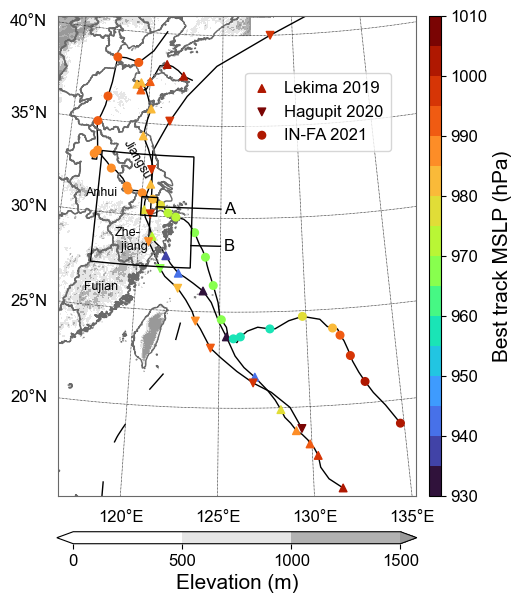

In [ ]:
fig=plt.figure(1)
fig.set_size_inches(6, 6)
x0=0.6
y0=0.8
ax=plt.axes([0.5-x0/2, 0.5-y0/2, x0, y0])
plt.sca(ax)


lon_range = [110, 140] 
lat_range = [15, 45]
# lon_range = [114, 125] 
# lat_range = [26, 41]


obs_map = ObservationMap(llon = lon_range[0], rlon = lon_range[1], llat = lat_range[0], ulat = lat_range[1])
obs_map.set_map(province_boundary_color = 'dimgray', province = True, coastline = False, south_China_sea =False, grid=True,\
                tick_label_size=12, lat_ticks=range(15,41,5), lon_ticks=range(115,136,5), projection='lcc',\
                lat_0=28, lat_1=40,  lon_0=126, width=2.2E6, height=2.95E6, lock_aspect=True)

'''PATH'''
num_colors = 16
cmap = plt.get_cmap('turbo', num_colors)
marker_size=30
obs_map.plot(tc_location_dict['LEKIMA'][:, 0], tc_location_dict['LEKIMA'][:, 1], color = 'k', linewidth=1)
s1=obs_map.scatter(tc_location_dict['LEKIMA'][0:-1:3, 0], tc_location_dict['LEKIMA'][0:-1:3, 1], 
                tc_location_dict['LEKIMA'][0:-1:3, 2], label = 'TC center', marker_size = marker_size, marker='^', 
                colorbar = False, zorder = 9999, cmap = cmap)
plt.clim(930, 1010)
obs_map.plot(tc_location_dict['HAGUPIT'][:, 0], tc_location_dict['HAGUPIT'][:, 1], color = 'k', linewidth=1)
s2=obs_map.scatter(tc_location_dict['HAGUPIT'][0:-1:3, 0], tc_location_dict['HAGUPIT'][0:-1:3, 1], 
                tc_location_dict['HAGUPIT'][0:-1:3, 2], label = 'TC center', marker_size = marker_size, marker='v', 
                colorbar = False, zorder = 9999, cmap = cmap)
plt.clim(930, 1010)
obs_map.plot(tc_location_dict['IN-FA'][:, 0], tc_location_dict['IN-FA'][:, 1], color = 'k', linewidth=1)
s3=obs_map.scatter(tc_location_dict['IN-FA'][0:-1:3, 0], tc_location_dict['IN-FA'][0:-1:3, 1], 
                tc_location_dict['IN-FA'][0:-1:3, 2], label = 'TC center', marker_size = marker_size, marker='o',  
                colorbar = False, zorder = 9999, cmap = cmap)
plt.clim(930, 1010)


'''Elevation'''
lon_list = np.arange(lon_range[0], lon_range[1]+0.01, 0.01)
lat_list = np.arange(lat_range[0], lat_range[1]+0.01, 0.01)
lon_grid, lat_grid = np.meshgrid(lon_list, lat_list)
_, _, elevation_grid = get_elevation_grid(lon_range, lat_range, 0.01)

cmap = truncate_colormap('gist_yarg', 0, 0.4)
cs = obs_map.contourf(lon_grid, lat_grid, elevation_grid, levels = np.arange(0, 2000, 500), cmap = cmap, zorder = 0,\
                      vmin = 500, vmax = 1500, latlon=True)


ax = plt.gca()
fontsize1=9
obs_map.text(119.3, 28.6, 'Zhe-\n    jiang', fontsize=fontsize1, va='center', ha='center', zorder=99999)
obs_map.text(117.4, 31, 'Anhui', fontsize=fontsize1, va='center', ha='center', zorder=99999)
obs_map.text(119.5, 33, 'Jiangsu', rotation=-60, fontsize=fontsize1, va='center', ha='center', zorder=99999)
obs_map.text(118, 26, 'Fujian', fontsize=fontsize1, va='center', ha='center', zorder=99999)


obs_map.add_rectangle_MapAttached(lon_list=[117.2, 123.2], lat_list=[27.3, 33.3], facecolor = 'none', edgecolor = 'black', linewidth = 1, zorder = 99999)
obs_map.add_rectangle_MapAttached(lon_list=[120, 121], lat_list=[30, 31], facecolor = 'none', edgecolor = 'black', linewidth = 1, zorder = 99999)
obs_map.plot(lons=[121,125], lats=[30.5,30.5], linewidth = 1, color = 'black', zorder = 99999)
obs_map.plot(lons=[123.2,125], lats=[28.5,28.5], linewidth = 1, color = 'black', zorder = 99999)
obs_map.text(x=125.2, y=30.5, s='A', ha='left',va='center')
obs_map.text(x=125.2, y=28.5, s='B', ha='left',va='center')


ax.spines['right'].set_color('dimgrey') # left, top, bottom
ax.spines['left'].set_color('dimgrey')
ax.spines['top'].set_color('dimgrey')
ax.spines['bottom'].set_color('dimgrey')
ax.tick_params(axis = 'both', length=0)


plt.legend([s1, s2, s3],['Lekima 2019', 'Hagupit 2020', 'IN-FA 2021'], loc='center left',\
           bbox_to_anchor=(0.5,0.8), fontsize=12, borderpad=0.5, handlelength=1)


fig = plt.gcf()
cbar_ax = fig.add_axes([0.5-x0/2, 0.5-y0/2-0.08, x0, 0.02])
cs1=fig.colorbar(cs, cax=cbar_ax, orientation='horizontal', ticks=[0, 500, 1000, 1500], extend='max')
cbar_ax.set_xlabel('Elevation (m)', fontsize = 15)
cs1.ax.tick_params(labelsize=12)

cbar_ax = fig.add_axes([0.5+x0/2+0.02, 0.5-y0/2, 0.02, y0])
cbar=fig.colorbar(s1, cax=cbar_ax)
cbar.set_label("Best track MSLP (hPa)", fontsize = 15)
cbar.ax.tick_params(labelsize=12)



fig_dir = '/mnt/cyy14/data_qg/old_draw/submit/'
plt.savefig(fig_dir + 'f03.pdf', dpi = 300, format='pdf', bbox_inches = 'tight')

